In [1]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('movie_review.csv')



C:\Users\seema.patil03\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [3]:
# Select 1000 rows and 'text' feature
sample_size = 1000
selected_data = df.sample(n=sample_size, random_state=42)[['text']]

In [4]:
# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    
    return tokens



In [5]:
# Apply preprocessing to the 'text' feature
selected_data['preprocessed_text'] = selected_data['text'].apply(preprocess_text)



In [6]:
# Train Word2Vec model
model = Word2Vec(sentences=selected_data['preprocessed_text'], vector_size=100, window=5, min_count=1, sg=0)


In [7]:
# Most similar words
word_to_find_similar = 'horror'
similar_words = model.wv.most_similar(word_to_find_similar)
print(f"Words similar to '{word_to_find_similar}': {similar_words}")



Words similar to 'horror': [('demand', 0.36871060729026794), ('visually', 0.31181252002716064), ('stealing', 0.31022825837135315), ('injury', 0.3021577298641205), ('offended', 0.29962146282196045), ('coppola', 0.2976016104221344), ('douglas', 0.2963656187057495), ('unpopular', 0.2909397780895233), ('car', 0.2793256342411041), ('kane', 0.2756015658378601)]


In [8]:
# Similarity between two words
word1 = 'actors'
word2 = 'film'
similarity = model.wv.similarity(word1, word2)
print(f"Similarity between '{word1}' and '{word2}': {similarity:.4f}")



Similarity between 'actors' and 'film': 0.0737


In [9]:
# Find the word that doesn't match
word_list = ['book', 'film', 'director', 'story', 'smart']
odd_one_out = model.wv.doesnt_match(word_list)
print(f"The word that doesn't match: {odd_one_out}")


The word that doesn't match: smart


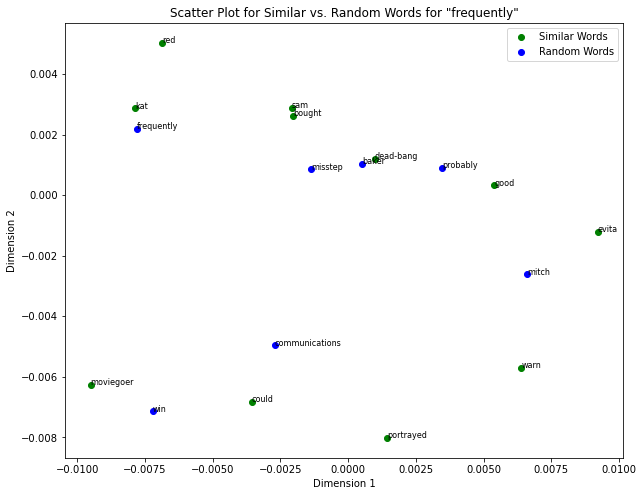

In [10]:
import random
import matplotlib.pyplot as plt
# Function to create scatter plot
def plot_similar_vs_random(word):
    similar_words = [word]
    similar_words.extend([w[0] for w in model.wv.most_similar(word, topn=9)])

    random_words = random.sample(model.wv.index_to_key, 8)

    words_to_plot = similar_words + random_words

    word_vectors = model.wv[words_to_plot]
    
    plt.figure(figsize=(10, 8))
    
    # Plot similar words in green
    plt.scatter(word_vectors[:11, 0], word_vectors[:11, 1], marker='o', color='green', label='Similar Words')
    
    # Plot random words in blue
    plt.scatter(word_vectors[11:, 0], word_vectors[11:, 1], marker='o', color='blue', label='Random Words')
    
    for i, word in enumerate(words_to_plot):
        plt.annotate(word, (word_vectors[i, 0], word_vectors[i, 1]), fontsize=8)
    
    plt.title(f'Scatter Plot for Similar vs. Random Words for "{word}"')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.legend()
    plt.show()

# Call the function with a specific word
plot_similar_vs_random('good')

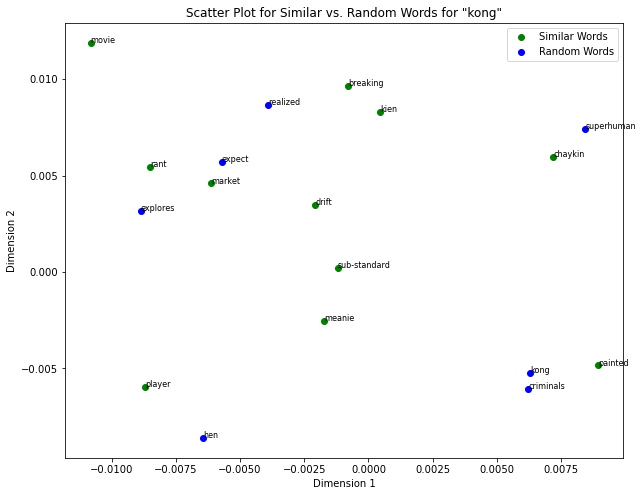

In [11]:
plot_similar_vs_random('movie')